# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [1]:
import numpy as np
import warnings
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
#https://drive.google.com/file/d/1v2fIEhRHmYTfLLL0WUKK_nPMLuYSDNhk/view?usp=sharing
!gdown --id 13kQUcl-N3ag6NXEm-QWjdUiuHO4-LOxb

C:\Users\никита\AppData\Local\Programs\Python\Python39\lib\site-packages\gdown\cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13kQUcl-N3ag6NXEm-QWjdUiuHO4-LOxb
To: C:\Users\никита\Desktop\Sample-ML-Repo\07. Classification Task\Advertising.csv

  0%|          | 0.00/5.17k [00:00<?, ?B/s]
100%|##########| 5.17k/5.17k [00:00<?, ?B/s]


In [3]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [7]:
X = data.drop(columns = ['Class'])
Y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)
Counter(y_train)

Counter({0: 199008, 1: 356})

In [8]:
# const
y_pred_const = np.zeros(len(X_test))
y_pred_proba_const = y_pred_const

In [9]:
# LogisticRegression
log_reg = LogisticRegression().fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

In [10]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

In [11]:
# accuracy
print('Const: ',accuracy_score(y_test, y_pred_const))
print('LogReg: ', accuracy_score(y_test, y_pred_log_reg))
print('KNN: ',accuracy_score(y_test, y_pred_knn))

Const:  0.9984082955888721
LogReg:  0.9990637032875719
KNN:  0.9984785178423042


In [12]:
# precision
print('Const: ', precision_score(y_test, y_pred_const))
print('LogReg: ', precision_score(y_test, y_pred_log_reg))
print('KNN: ', precision_score(y_test, y_pred_knn))

Const:  0.0
LogReg:  0.7089552238805971
KNN:  1.0


In [13]:
# recall
print('Const: ', recall_score(y_test, y_pred_const))
print('LogReg: ', recall_score(y_test, y_pred_log_reg))
print('KNN: ', recall_score(y_test, y_pred_knn))

Const:  0.0
LogReg:  0.6985294117647058
KNN:  0.04411764705882353


In [14]:
# f1
print('Const: ', f1_score(y_test, y_pred_const))
print('LogReg: ', f1_score(y_test, y_pred_log_reg))
print('KNN: ', f1_score(y_test, y_pred_knn))

Const:  0.0
LogReg:  0.7037037037037037
KNN:  0.08450704225352113


In [15]:
# roc_auc
print('Const: ', roc_auc_score(y_test, y_pred_proba_const))
print('LogReg: ', roc_auc_score(y_test, y_pred_proba_log_reg))
print('KNN: ', roc_auc_score(y_test, y_pred_proba_knn))

Const:  0.5
LogReg:  0.9450064093767908
KNN:  0.6163120449394196


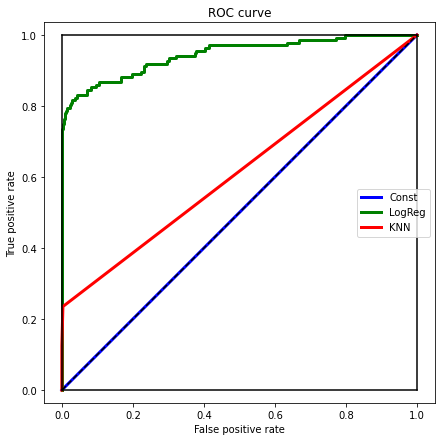

In [16]:
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_const)
plt.plot(fpr, tpr, 'b', linewidth=3)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log_reg)
plt.plot(fpr, tpr, 'g', linewidth=3)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn)
plt.plot(fpr, tpr, 'r', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.legend(('Const','LogReg','KNN'))
plt.show()

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

Наша цель забанить всех мошенников среди всех пользователей, а если мы случайно забаним не мошенника, то разбанить его можно через 'обращение в службу поддержки' (надо повышать recall)
Но все таки если мы будем банить слишком много, то доверие к банку будет падать (нельзя забывать и о precision)
Из вышесказанного следует, метрика f2_score будет удовлетворить нашим условиям(что-то среднее, но есть уклон к recall)

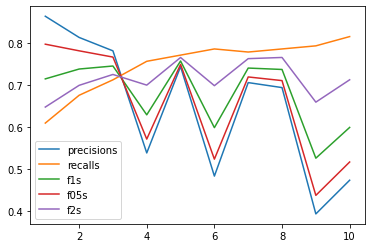

In [60]:
from sklearn.metrics import fbeta_score

precisions = []
recalls = []
f1s = []
f05s = []
f2s = []

weights = range(1, 11)
for i in weights:
  log_reg_w = LogisticRegression(class_weight={0:1, 1:i}, max_iter=1000)
  log_reg_w.fit(X_train, y_train)
  y_pred = log_reg_w.predict(X_test)
  precisions.append(precision_score(y_test, y_pred))
  recalls.append(recall_score(y_test, y_pred))
  f05s.append(fbeta_score(y_test, y_pred, beta=0.5))
  f2s.append(fbeta_score(y_test, y_pred, beta=2))
  f1s.append(fbeta_score(y_test, y_pred, beta=1))

plt.plot(weights, precisions)
plt.plot(weights, recalls)
plt.plot(weights, f1s)
plt.plot(weights, f05s)
plt.plot(weights, f2s)
plt.legend(['precisions', 'recalls', 'f1s', 'f05s', 'f2s'])

## (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

In [86]:
corr = abs(data.corr())
for i in corr:
    for j in corr[i]:
        if j > 0.4 and j < 1:
            print(j, i, corr[i][corr[i] == j])



0.41961817221152137 Time V3    0.419618
Name: Time, dtype: float64
0.5314089393280346 V2 Amount    0.531409
Name: V2, dtype: float64
0.41961817221152137 V3 Time    0.419618
Name: V3, dtype: float64
0.5314089393280346 Amount V2    0.531409
Name: Amount, dtype: float64


In [92]:
corr[corr['Class'] < 0.01]['Class']

V13       0.004570
V15       0.004223
V22       0.000805
V23       0.002685
V24       0.007221
V25       0.003308
V26       0.004455
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

V13, V15, V22, V23, V24, V25, V26, V28 особо не влияют на Class -> удалим их (Amount сильно связан с V2)
и добавим Time * V3, V2 * Amount

In [128]:
new_data = data.copy()
del new_data['V13']
del new_data['V15']
del new_data['V22']
del new_data['V23']
del new_data['V24']
del new_data['V25']
del new_data['V26']
del new_data['V28']
new_data['Time * V3'] = new_data['Time'] * new_data['V3']
new_data['Amount * V2'] = new_data['Amount'] * new_data['V2']
new_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V17,V18,V19,V20,V21,V27,Amount,Class,Time * V3,Amount * V2
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.207971,0.025791,0.403993,0.251412,-0.018307,0.133558,149.62,0,0.000000e+00,-10.889519
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.008983,2.69,0,0.000000e+00,0.715945
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.055353,378.66,0,1.773209e+00,-507.466150
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.062723,123.50,0,1.792993e+00,-22.875412
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.219422,69.99,0,3.097436e+00,61.432795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.991691,0.510632,-0.682920,1.475829,0.213454,0.943651,0.77,0,-1.699313e+06,7.755274
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.068472,24.79,0,3.516267e+05,-1.365445
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.313502,0.395652,-0.577252,0.001396,0.232045,0.004455,67.88,0,-5.614988e+05,-20.449111
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.509928,1.113981,2.897849,0.127434,0.265245,0.108821,10.00,0,1.213853e+05,5.304825


In [129]:
X = new_data.drop(columns = ['Class'])
Y = new_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)
Counter(y_train)


Counter({0: 199008, 1: 356})

In [130]:
log_reg = LogisticRegression().fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

In [131]:
print('LogReg precision: ', precision_score(y_test, y_pred_log_reg))
print('LogReg: recall', recall_score(y_test, y_pred_log_reg))
print('LogReg f2_score: ', fbeta_score(y_test, y_pred_log_reg, beta = 2))

LogReg precision:  0.5189873417721519
LogReg: recall 0.3014705882352941
LogReg f2_score:  0.32905296950240775


Умножение сильно взаимосвязанных параметров датасета и удаление не влияющих данных привели к ухудшению всего, что только можно, попробуем возвести в квадрат то, что сильно влияет на Class

In [135]:
corr[corr['Class'] > 0.2]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V10,0.030617,7.388135e-17,3.991394e-16,1.156587e-15,2.232685e-16,5.202306e-16,5.932243e-17,7.492834e-17,2.801370e-16,4.642274e-16,...,1.177547e-15,6.418202e-16,3.214491e-16,1.355885e-16,2.846052e-16,3.028119e-16,2.197977e-16,4.864782e-17,0.101502,0.216883
V12,0.124348,2.053457e-16,9.568710e-17,6.310231e-16,5.625518e-16,7.412552e-16,2.375468e-16,3.536655e-18,1.839891e-16,1.079314e-15,...,7.300527e-16,1.644699e-16,1.800885e-16,4.436512e-16,5.712973e-16,2.359969e-16,4.672391e-16,6.415167e-16,0.009542,0.260593
V14,0.098757,5.020280e-16,1.730566e-16,4.739859e-16,2.282280e-16,6.565143e-16,2.621312e-16,2.607772e-16,8.599156e-16,3.784757e-15,...,3.356561e-16,3.740383e-16,3.883204e-16,2.003482e-16,8.547932e-16,1.660327e-16,1.044274e-16,2.289427e-15,0.033751,0.302544
V17,0.073297,3.879840e-16,2.685296e-16,7.614712e-16,2.699612e-16,1.281914e-16,2.015618e-16,2.177192e-16,2.269549e-16,1.113695e-15,...,8.230527e-16,8.743398e-16,3.706214e-16,2.403828e-16,2.666806e-16,6.932833e-16,6.148525e-16,5.534540e-17,0.007309,0.326481
Class,0.012323,1.013473e-01,9.128865e-02,1.929608e-01,1.334475e-01,9.497430e-02,4.364316e-02,1.872566e-01,1.987512e-02,9.773269e-02,...,4.041338e-02,8.053175e-04,2.685156e-03,7.220907e-03,3.307706e-03,4.455398e-03,1.757973e-02,9.536041e-03,0.005632,1.000000


In [137]:
new_data = data.copy()
new_data['new V10'] = new_data['V10'] ** 2
new_data['new V12'] = new_data['V12'] ** 2
new_data['new V14'] = new_data['V14'] ** 2
new_data['new V17'] = new_data['V17'] ** 2
X = new_data.drop(columns = ['Class'])
Y = new_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)
log_reg = LogisticRegression().fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]
print('LogReg precision: ', precision_score(y_test, y_pred_log_reg))
print('LogReg: recall', recall_score(y_test, y_pred_log_reg))
print('LogReg f2_score: ', fbeta_score(y_test, y_pred_log_reg, beta = 2))

LogReg precision:  0.3660130718954248
LogReg: recall 0.4117647058823529
LogReg f2_score:  0.4017216642754663


Тоже ничего не дало, будем работать с начальным датасетом(переберем веса)

In [138]:
X = data.drop(columns = ['Class'])
Y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)
log_reg = LogisticRegression().fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

LogReg precision:  0.7089552238805971
LogReg: recall 0.6985294117647058
LogReg f2_score:  0.7005899705014749


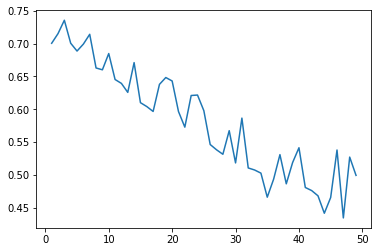

In [139]:
f2s = []
weights = range(1, 50)
for i in weights:
  log_reg_w = LogisticRegression(class_weight={0:1, 1:i})
  log_reg_w.fit(X_train, y_train)
  y_pred = log_reg_w.predict(X_test)
  f2s.append(fbeta_score(y_test, y_pred, beta=2))


plt.plot(weights, f2s)
plt.show()

Рассмотрим более подробно  маленькие веса (0-8)

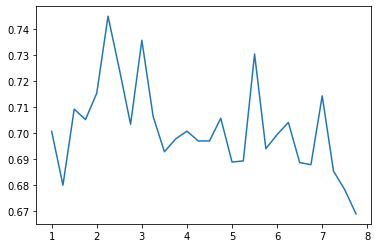

In [142]:
f2s = []
weights = np.arange(1, 8,0.25)
for i in weights:
  log_reg_w = LogisticRegression(class_weight={0:1, 1:i})
  log_reg_w.fit(X_train, y_train)
  y_pred = log_reg_w.predict(X_test)
  f2s.append(fbeta_score(y_test, y_pred, beta=2))


plt.plot(weights, f2s)
plt.show()

In [143]:
log_reg = LogisticRegression(class_weight={0:1, 1:2.25}).fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]
print('LogReg precision: ', precision_score(y_test, y_pred_log_reg))
print('LogReg: recall', recall_score(y_test, y_pred_log_reg))
print('LogReg f2_score: ', fbeta_score(y_test, y_pred_log_reg, beta = 2))

LogReg precision:  0.6753246753246753
LogReg: recall 0.7647058823529411
LogReg f2_score:  0.7449856733524355


# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

In [153]:
#https://drive.google.com/file/d/1gkGIisyyiKd_v8wfFWrs4MHWooedmd8D/view?usp=sharing
!gdown --id 13kQUcl-N3ag6NXEm-QWjdUiuHO4-LOxb

Access denied with the following error:


C:\Users\никита\AppData\Local\Programs\Python\Python39\lib\site-packages\gdown\cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=13kQUcl-N3ag6NXEm-QWjdUiuHO4-LOxb 



In [200]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [201]:
df.shape

(4177, 9)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [203]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.(Взял дополнительно: Метод опорных Векторов (SVMs), Деревья Решений & Случайные Леса)

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [204]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Добавим столбцы F , I , M

In [208]:
df['F'] = np.where(df.Sex == 'F', 1, 0)
df['I'] = np.where(df.Sex == 'I', 1, 0)
df['M'] = np.where(df.Sex == 'M', 1, 0)
del df['Sex']
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [210]:
X = df.drop(columns = ['Rings'])
Y = df['Rings']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)
Counter(y_train)

Counter({9: 477,
         7: 262,
         11: 350,
         13: 150,
         12: 183,
         8: 404,
         17: 44,
         4: 38,
         14: 92,
         10: 443,
         6: 182,
         5: 70,
         20: 20,
         15: 72,
         19: 24,
         23: 4,
         3: 12,
         16: 46,
         18: 27,
         21: 11,
         29: 1,
         2: 1,
         22: 3,
         26: 1,
         27: 2,
         1: 1,
         24: 2,
         25: 1})

In [211]:
# LogisticRegression
log_reg = LogisticRegression().fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

In [212]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

In [213]:
# SVM
svm = SVC(probability=True).fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_pred_proba_svm = svm.predict_proba(X_test)[:, 1]

In [214]:
# DecisionTree
tree = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_pred_proba_tree = tree.predict_proba(X_test)[:, 1]

In [215]:
# RandomForest
forest = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
y_pred_proba_forest = forest.predict_proba(X_test)[:, 1]

In [216]:
# accuracy
print('LogReg: ', accuracy_score(y_test, y_pred_log_reg))
print('KNN: ',accuracy_score(y_test, y_pred_knn))
print('SVM: ',accuracy_score(y_test, y_pred_svm))
print('DecisionTree: ',accuracy_score(y_test, y_pred_tree))
print('RandomForest: ',accuracy_score(y_test, y_pred_forest))

LogReg:  0.2647527910685805
KNN:  0.24003189792663476
SVM:  0.2687400318979266
DecisionTree:  0.19936204146730463
RandomForest:  0.21212121212121213


In [217]:
# precision macro
print('LogReg: ', precision_score(y_test, y_pred_log_reg,  average='macro'))
print('KNN: ',precision_score(y_test, y_pred_knn,  average='macro'))
print('SVM: ',precision_score(y_test, y_pred_svm,  average='macro'))
print('DecisionTree: ',precision_score(y_test, y_pred_tree,  average='macro'))
print('RandomForest: ',precision_score(y_test, y_pred_forest,  average='macro'))

LogReg:  0.08058748955557234
KNN:  0.14501188073455987
SVM:  0.09783339539124938
DecisionTree:  0.17438434575624703
RandomForest:  0.12631818661810823


In [218]:
# precision micro
print('LogReg: ', precision_score(y_test, y_pred_log_reg,  average='micro'))
print('KNN: ',precision_score(y_test, y_pred_knn,  average='micro'))
print('SVM: ',precision_score(y_test, y_pred_svm,  average='micro'))
print('DecisionTree: ',precision_score(y_test, y_pred_tree,  average='micro'))
print('RandomForest: ',precision_score(y_test, y_pred_forest,  average='micro'))

LogReg:  0.2647527910685805
KNN:  0.24003189792663476
SVM:  0.2687400318979266
DecisionTree:  0.19936204146730463
RandomForest:  0.21212121212121213


In [219]:
# recall macro
print('LogReg: ', recall_score(y_test, y_pred_log_reg,  average='macro'))
print('KNN: ',recall_score(y_test, y_pred_knn,  average='macro'))
print('SVM: ',recall_score(y_test, y_pred_svm,  average='macro'))
print('DecisionTree: ',recall_score(y_test, y_pred_tree,  average='macro'))
print('RandomForest: ',recall_score(y_test, y_pred_forest,  average='macro'))

LogReg:  0.1054587806639054
KNN:  0.12640978544669954
SVM:  0.10612135830169286
DecisionTree:  0.14692691247055512
RandomForest:  0.1357279287469389


In [220]:
# recall micro
print('LogReg: ', recall_score(y_test, y_pred_log_reg,  average='micro'))
print('KNN: ',recall_score(y_test, y_pred_knn,  average='micro'))
print('SVM: ',recall_score(y_test, y_pred_svm,  average='micro'))
print('DecisionTree: ',recall_score(y_test, y_pred_tree,  average='micro'))
print('RandomForest: ',recall_score(y_test, y_pred_forest,  average='micro'))

LogReg:  0.2647527910685805
KNN:  0.24003189792663476
SVM:  0.2687400318979266
DecisionTree:  0.19936204146730463
RandomForest:  0.21212121212121213


In [221]:
# f1 macro
print('LogReg: ', f1_score(y_test, y_pred_log_reg,  average='macro'))
print('KNN: ',f1_score(y_test, y_pred_knn,  average='macro'))
print('SVM: ',f1_score(y_test, y_pred_svm,  average='macro'))
print('DecisionTree: ',f1_score(y_test, y_pred_tree,  average='macro'))
print('RandomForest: ',f1_score(y_test, y_pred_forest,  average='macro'))

LogReg:  0.08983461212264683
KNN:  0.12734323708827586
SVM:  0.091559644789425
DecisionTree:  0.14668985519774982
RandomForest:  0.1282435133065179


In [222]:
# f1 micro
print('LogReg: ', f1_score(y_test, y_pred_log_reg,  average='micro'))
print('KNN: ',f1_score(y_test, y_pred_knn,  average='micro'))
print('SVM: ',f1_score(y_test, y_pred_svm,  average='micro'))
print('DecisionTree: ',f1_score(y_test, y_pred_tree,  average='micro'))
print('RandomForest: ',f1_score(y_test, y_pred_forest,  average='micro'))

LogReg:  0.2647527910685805
KNN:  0.24003189792663476
SVM:  0.2687400318979266
DecisionTree:  0.19936204146730463
RandomForest:  0.21212121212121215


Лучший результат дает LogReg и SVM 

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

Наша цель определить Rings, занчит нам надо уевличить точность precision, с усреднением micro
Попробуем разные коэфиценты и классификаторы 

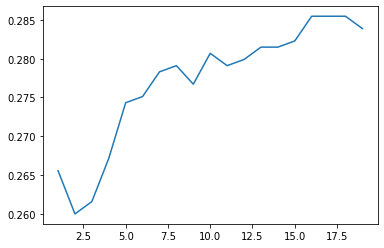

In [242]:
precisions = []
coefs = np.arange(1,20)
sol = 'newton-cg'
for c in coefs:
    logreg = LogisticRegression(C=c,solver=sol).fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    precisions.append(precision_score(y_test, y_pred, average='micro'))
plt.plot(coefs, precisions)
plt.show()

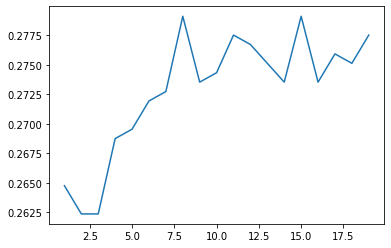

In [243]:
precisions = []
coefs = np.arange(1,20)
sol = 'lbfgs'
for c in coefs:
    logreg = LogisticRegression(C=c,solver=sol).fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    precisions.append(precision_score(y_test, y_pred, average='micro'))
plt.plot(coefs, precisions)
plt.show()

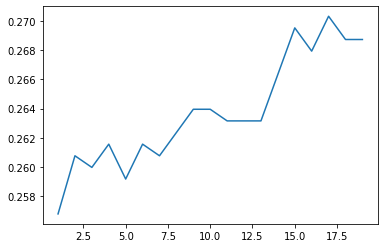

In [244]:
precisions = []
coefs = np.arange(1,20)
sol = 'liblinear'
for c in coefs:
    logreg = LogisticRegression(C=c,solver=sol).fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    precisions.append(precision_score(y_test, y_pred, average='micro'))
plt.plot(coefs, precisions)
plt.show()

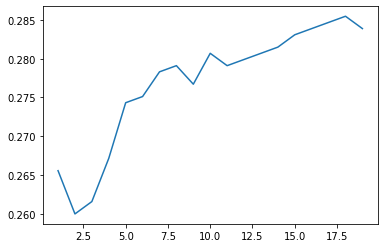

In [245]:
precisions = []
coefs = np.arange(1,20)
sol = 'sag'
for c in coefs:
    logreg = LogisticRegression(C=c,solver=sol).fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    precisions.append(precision_score(y_test, y_pred, average='micro'))
plt.plot(coefs, precisions)
plt.show()

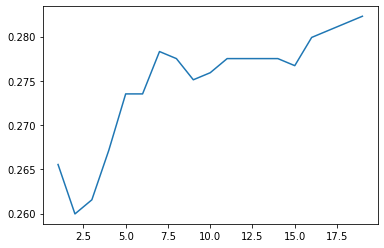

In [246]:
precisions = []
coefs = np.arange(1,20)
sol = 'saga'
for c in coefs:
    logreg = LogisticRegression(C=c,solver=sol).fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    precisions.append(precision_score(y_test, y_pred, average='micro'))
plt.plot(coefs, precisions)
plt.show()

Возьмем C=17.5 и solver='sag

In [247]:
log_reg = LogisticRegression(C=17.5,solver='sag').fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

In [248]:
print('LogReg  accuracy: ', accuracy_score(y_test, y_pred_log_reg))
print('LogReg precision macro: ', precision_score(y_test, y_pred_log_reg,  average='macro'))
print('LogReg precision micro: ', precision_score(y_test, y_pred_log_reg,  average='micro'))
print('LogReg recall macro: ', recall_score(y_test, y_pred_log_reg,  average='macro'))
print('LogReg recall micro: ', recall_score(y_test, y_pred_log_reg,  average='micro'))
print('LogReg f1 macro: ', f1_score(y_test, y_pred_log_reg,  average='macro'))
print('LogReg f1 micro: ', f1_score(y_test, y_pred_log_reg,  average='micro'))

LogReg  accuracy:  0.28548644338118023
LogReg precision macro:  0.174637696184696
LogReg precision micro:  0.28548644338118023
LogReg recall macro:  0.15261054161330037
LogReg recall micro:  0.28548644338118023
LogReg f1 macro:  0.1497011587138921
LogReg f1 micro:  0.28548644338118023


Мы улучшили наши метрики